In [1]:
import random
from pprint import pprint
import io
import imageio.v2 as imageio
import matplotlib.pyplot as plt

from tyssue.generation.hexagonal_grids import circle
from scipy.spatial import Voronoi
from tyssue.generation import from_2d_voronoi
from tyssue import Sheet, SheetGeometry
from tyssue import config
from tyssue.draw import sheet_view
from tyssue.dynamics.planar_vertex_model import PlanarModel as model
from tyssue.solvers.quasistatic import QSSolver

from process_bigraph import Process, Composite, ProcessTypes
from process_bigraph.emitter import emitter_from_wires, gather_emitter_results
from spatial_transport.processes.diffusion import SimpleDiffusion
from spatial_transport.processes.tyssue_diffusion import run_tyssue_diffusion, static_sheet_video_2d
from spatial_transport import register_types


from spatial_transport.processes.diffusion import get_simple_diffusion_spec

C++ extensions are not available for this version

This module needs ipyvolume to work.
You can install it with:
$ conda install -c conda-forge ipyvolume



/opt/anaconda3/envs/spatial-transport/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/Users/tasnifrahman/tyssue/src/tyssue/dynamics/effectors.py:607: SyntaxWarning: invalid escape sequence '\m'
  """
/Users/tasnifrahman/tyssue/src/tyssue/dynamics/effectors.py:672: SyntaxWarning: invalid escape sequence '\d'
  """
<unknown>:1: SyntaxWarning: invalid escape sequence '\s'


collision solver could not be imported You may need to install CGAL and re-install tyssue


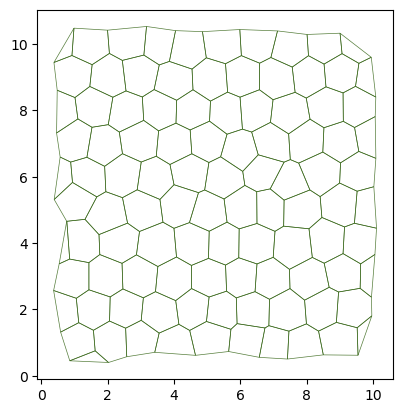

In [2]:
sheet = Sheet.planar_sheet_3d("sheet", nx=20, ny=20, distx=1, disty=1, noise = 0.1)
sheet.sanitize(trim_borders=True)
sheet = sheet.extract_bounding_box(x_boundary=(0.2,10.2), y_boundary=(0.2,10.2), coords=['x', 'y', 'z'])
sheet.sanitize(trim_borders=True)
SheetGeometry.update_all(sheet)
fig, ax = sheet_view(sheet)

In [3]:
sheet.edge_df["line_tension"] = 0.00
sheet.face_df["area_elasticity"] = 0.0
sheet.face_df["prefered_area"] = sheet.face_df["area"]
sheet.face_df["contractility"] = 0.00

In [4]:
sheet.face_df.loc[45, "prefered_area"] = sheet.face_df.loc[12, "area"]*2
sheet.face_df.loc[45, "area_elasticity"] = 1

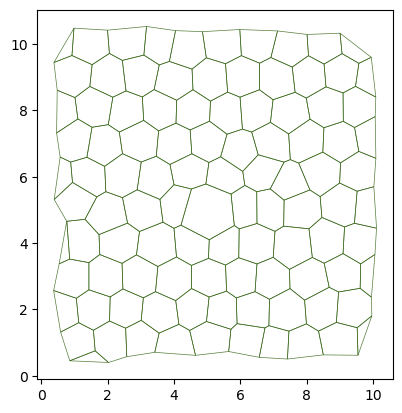

In [5]:
solver = QSSolver()
res = solver.find_energy_min(sheet, SheetGeometry, model)
fig, ax = sheet_view(sheet)

In [6]:
substrates = {
        "glucose": 0.06,
        "acetate": 0.12,
    }
# create the core object
core = ProcessTypes()
# register data types
core = register_types(core)
core.register_process("SimpleDiffusion", SimpleDiffusion)
results = run_tyssue_diffusion(core, sheet, substrates)
pprint(len(results))
static_sheet_video_2d(results, sheet, "glucose", vmax=10)

{'Compartments': {'0': {'Shared Environment': {'concentrations': {'acetate': 3.211702435760019,
                                                                  'glucose': 9.398957535284524},
                                               'counts': {'acetate': 2.5081110208372333,
                                                          'glucose': 7.33991689770282},
                                               'volume': 0.7809288285587118},
                        'position': [1.5024787261494312,
                                     0.534535060199185,
                                     0.0]},
                  '1': {'Shared Environment': {'concentrations': {'acetate': 2.57230029169461,
                                                                  'glucose': 1.224630134889223},
                                               'counts': {'acetate': 8.288028505422497,
                                                          'glucose': 3.9457949366691927},
                         